In [1]:
import pandas as pd
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mikhail\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
data = pd.read_csv(r'C:\Users\Mikhail\Documents\Data 606\cleaned_data.csv')
data.head()

,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,Side,...,State_Hwy,Numbered_Hwy,County_Hwy,multi_vehicle,serious,spillage,construction_area,road_blocked,jacknifed,ramp_blocked
0,201,3,2/8/2016 5:46,2/8/2016 11:00,39.865147,-84.058723,0.01,right lane blocked due to accident on i-70 eas...,I-70 E,2,...,0,0,0,0,0,0,0,1,0,0
1,201,2,2/8/2016 6:07,2/8/2016 6:37,39.928059,-82.831184,0.01,accident on brice rd at tussing rd. expect del...,Brice Rd,1,...,0,0,0,0,0,0,0,0,0,0
2,201,2,2/8/2016 6:49,2/8/2016 7:19,39.063148,-84.032608,0.01,accident on oh-32 state route 32 westbound at ...,State Route 32,2,...,1,0,0,0,0,0,0,0,0,0
3,201,3,2/8/2016 7:23,2/8/2016 7:53,39.747753,-84.205582,0.01,accident on i-75 southbound at exits 52 52b us...,I-75 S,2,...,0,0,0,0,0,0,0,0,0,0
4,201,2,2/8/2016 7:39,2/8/2016 8:09,39.627781,-84.188354,0.01,accident on mcewen rd at oh-725 miamisburg cen...,Miamisburg Centerville Rd,2,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#Accident descriptions from 3 and 4 severity levels
fours = data[data['Severity'] == 4].copy()
fours_desc = " ".join(d for d in fours['Description'])

threes = data[data['Severity'] == 3].copy()
threes_desc = " ".join(d for d in threes['Description'])

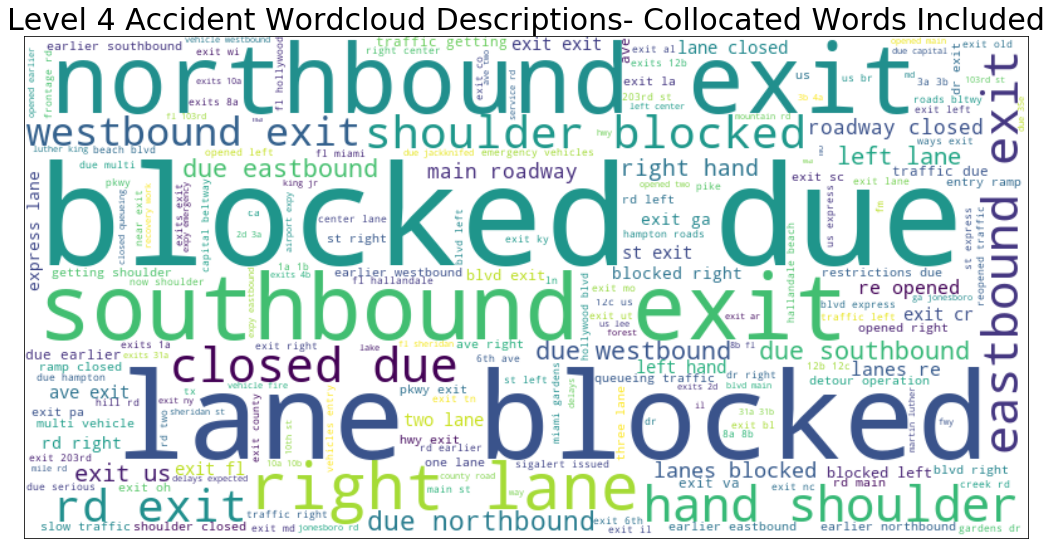

In [4]:
#Defining stopwords
stopwords = set(STOPWORDS)
stopwords.update(["accident"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white", height = 400, width = 800).generate(fours_desc)

#Display wordcloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Level 4 Accident Wordcloud Descriptions- Collocated Words Included', size = 30)
plt.axis('image')
plt.xticks([])
plt.yticks([])
fig = plt.gcf()
fig.set_size_inches(18,15)

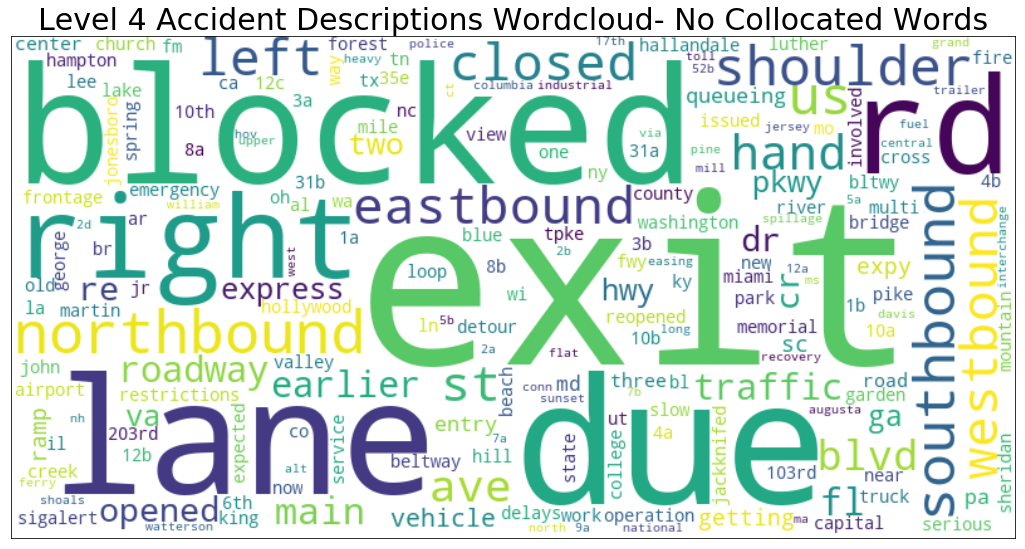

In [5]:
#Wordcloud without bigrams
wc_2 = WordCloud(stopwords=stopwords, background_color="white", height = 400, width = 800, collocations = False).generate(fours_desc)

#Display wordcloud
plt.imshow(wc_2, interpolation='bilinear')
plt.title('Level 4 Accident Descriptions Wordcloud- No Collocated Words', size = 30)
plt.axis("image")
plt.xticks([])
plt.yticks([])
fig = plt.gcf()
fig.set_size_inches(18,15)

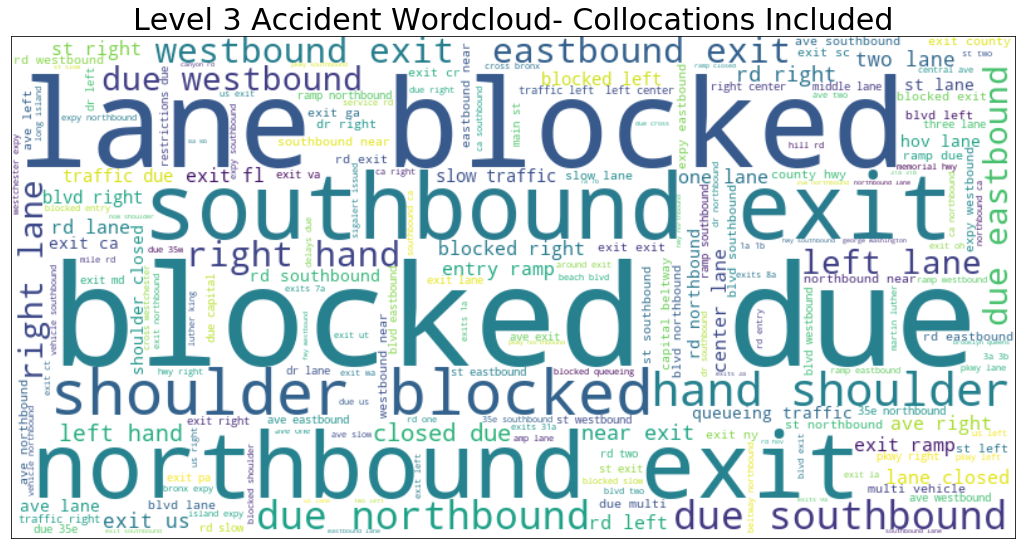

In [6]:
#Wordcloud with bigrams
wc_3 = WordCloud(stopwords=stopwords, background_color="white", height = 400, width = 800).generate(threes_desc)

#Display word cloud
plt.imshow(wc_3, interpolation='bilinear')
plt.title('Level 3 Accident Wordcloud- Collocations Included', size = 30)
plt.axis("image")
plt.xticks([])
plt.yticks([])
fig = plt.gcf()
fig.set_size_inches(18,15)

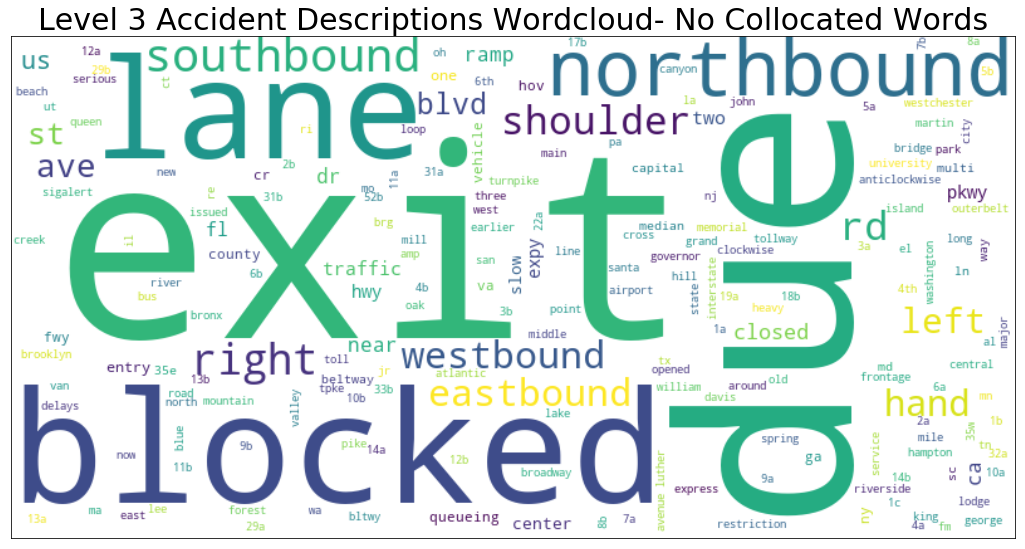

In [7]:
#Wordcloud with no bigrams
wc_3_1gram = WordCloud(stopwords=stopwords, background_color="white", height = 400, width = 800, collocations = False).generate(threes_desc)

#Display wordcloud
plt.imshow(wc_3_1gram, interpolation='bilinear')
plt.title('Level 3 Accident Descriptions Wordcloud- No Collocated Words', size = 30)
plt.axis("image")
plt.xticks([])
plt.yticks([])
fig = plt.gcf()
fig.set_size_inches(18,15)

There appear to be a greater variety of single words in level 4 accidents compared to level 3, and a more even distribution of words

In [14]:
#Tokenizing both descriptions
fours_desc = word_tokenize(fours_desc)
threes_desc = word_tokenize(threes_desc)

In [15]:
#Finding 100 most common words in both descriptions
fours_freq_dist = nltk.FreqDist(w for w in fours_desc if w not in stopwords)    
top100 = fours_freq_dist.most_common(100)

threes_freq_dist = nltk.FreqDist(w for w in threes_desc if w not in stopwords)   
top100_3 = threes_freq_dist.most_common(100)

In [17]:
num_4_words = len(fours_desc)
num_3_words = len(threes_desc)

#Finding percentages of how often words appeared in descriptions
top100_dict = {t[0] : t[1] / num_4_words for t in top100}
top100_3_dict = {t[0] : t[1] /num_3_words for t in top100_3}

#Finding how many times a word appeared in level 4 descriptions for each appearance in level 3. 100 means it did not appear in 3
freq_diffs = {}

for key in list(top100_dict.keys()):
    if key in list(top100_3_dict.keys()):
        freq_diffs[key] = top100_dict[key] / top100_3_dict[key]
    else:
        freq_diffs[key] = 100

freq_diffs

{'exit': 1.4230437450054763,
 '.': 0.9427071998444093,
 'due': 0.8219167701297055,
 'blocked': 0.7267388559688107,
 'lane': 0.7046458123449189,
 'rd': 1.3887997660917981,
 'right': 0.8737628395803525,
 'northbound': 0.6604479522581101,
 'exits': 0.9523222626487339,
 'southbound': 0.6306858957383343,
 'shoulder': 0.8313445325743276,
 'eastbound': 0.806129195425745,
 'closed': 2.7216515404562034,
 'left': 0.8830676572923019,
 'lanes': 3.3728123559039003,
 'westbound': 0.7480234429673608,
 'hand': 0.6976901749120786,
 'i-95': 1.0737604641730065,
 'blvd': 0.8480096314546891,
 'main': 8.215898355330996,
 'earlier': 100,
 'st.': 0.5936573259687227,
 'roadway': 100,
 'traffic': 1.638860931743806,
 'st': 4.1535726967668625,
 're-opened': 100,
 'ave.': 0.4392557480790277,
 'ave': 4.500078248885959,
 'two': 1.1899456035920524,
 'i-75': 0.9033207083559882,
 '2': 0.984421258289961,
 'hwy': 1.7992979025390317,
 'express': 100,
 'pkwy': 1.1341075489263421,
 'i-10': 0.6436291830820243,
 'i-70': 2.631

In [21]:
sorted_freq_diffs = {k: v for k, v in sorted(freq_diffs.items(), key=lambda item: item[1])}
sorted_freq_diffs

{'i-5': 0.17998183491204767,
 'near': 0.20693803780692493,
 'ramp': 0.3732729087203254,
 'slow': 0.3762165981727106,
 '#': 0.3907545844450243,
 'ave.': 0.4392557480790277,
 'center': 0.5011024571772129,
 'i-80': 0.530019276517011,
 '1': 0.5413604078288519,
 'i-495': 0.5581324156183405,
 'one': 0.5629165626416341,
 'fwy': 0.5901529111798716,
 'st.': 0.5936573259687227,
 'expy': 0.5944154680483579,
 'southbound': 0.6306858957383343,
 'i-10': 0.6436291830820243,
 'northbound': 0.6604479522581101,
 'dr.': 0.6975661511253296,
 'hand': 0.6976901749120786,
 'lane': 0.7046458123449189,
 'i-94': 0.720471910752908,
 'blocked': 0.7267388559688107,
 'i-90': 0.7309089357074207,
 'westbound': 0.7480234429673608,
 'entry': 0.7690334189245458,
 'eastbound': 0.806129195425745,
 '3': 0.8178185076086179,
 'due': 0.8219167701297055,
 'i-35': 0.8243288883411478,
 '10': 0.8282766390177794,
 'shoulder': 0.8313445325743276,
 'blvd': 0.8480096314546891,
 'right': 0.8737628395803525,
 'left': 0.8830676572923019

Several terms are of particular interest here. "Near", "Ramp", "Slow" and "Center" appeared significantly less in level 4 descriptions, while "Main", "St", "Closed" and "Lanes" appeared significantly more often. Of terms that only appeared in level 4s, "emergency", "vehicles", "earlier", "roadway", "re-opened", "delays", "detour" and "operation" are all of interest.